## HKO Meteorological Data Analysis and Visualisation Project
### Chow Cheuk Yiu
### April 2020

## Data Collection and Cleaning


In [243]:
import pandas as pd

In [244]:
j2015 = pd.read_html('Daily Extract 2015.html')[0]
j2016 = pd.read_html('Daily Extract 2016.html')[0]
j2017 = pd.read_html('Daily Extract 2017.html')[0]
j2018 = pd.read_html('Daily Extract 2018.html')[0]
j2019 = pd.read_html('Daily Extract 2019.html')[0]

In [246]:
j2016

Day Hong Kong Observatory                              \
           Day   Mean Pressure (hPa)             Air Temperature   
           Day   Mean Pressure (hPa) Absolute Daily Max (deg. C)   
0           01                1025.9                        19.9   
1           02                1022.0                        21.7   
2           03                1019.7                        20.3   
3           04                1018.9                        22.3   
4           05                1015.9                        21.3   
5           06                1018.8                        24.3   
6           07                1021.8                        21.4   
7           08                1020.8                        21.0   
8           09                1020.6                        18.9   
9           10                1017.5                        18.5   
10          11                1016.5                        20.4   
11          12                1019.9                        18.5   
12          13                1020.8                        18.7   
13          14                1019.3                        17.5   
14          15                1015.4                        16.1   
15          16                1013.5                        17.1   
16          17                1011.5                        20.6   
17          18                1017.1                        17.8   
18          19                1020.1                        17.6   
19          20                1019.6                        16.8   
20          21                1017.7                        17.1   
21          22                1018.9                        16.2   
22          23                1027.1                        10.4   
23          24                1034.6                         7.1   
24          25                1032.6                        10.8   
25          26                1027.1                        13.5   
26          27                1022.7                        15.3   
27          28                1018.2                        17.4   
28          29                1017.9                        17.4   
29          30                1020.0                        19.9   
30          31                1019.9                        16.2   
31  Mean/Total                1020.4                        17.8   
32     Normal?                1020.3                        18.6   

                                                                      \
                                             Mean Dew Point (deg. C)   
   Mean (deg. C) Absolute Daily Min (deg. C) Mean Dew Point (deg. C)   
0           18.3                        16.8                    13.1   
1           18.9                        17.2                    15.6   
2           19.3                        18.0                    18.4   
3           20.6                        19.1                    18.8   
4           20.7                        20.2                    19.9   
5           20.9                        19.2                    18.0   
6           18.8                        17.0                    15.0   
7           18.4                        16.5                    14.4   
8           18.1                        17.1                    14.3   
9           18.0                        17.2                    15.5   
10          18.1                        16.5                    16.4   
11          17.3                        16.1                    13.7   
12          16.1                        14.2                    12.1   
13          16.5                        15.6                    12.9   
14          15.1                        14.5                    14.6   
15          16.4                        15.5                    15.6   
16          17.8                        14.8                    16.1   
17          15.2                        11.9                    11.1   
18          16.4                        15.3      

In [253]:
j2015.columns = cols
j2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Day                                  33 non-null     object 
 1   Mean Pressure (hPa)                  33 non-null     float64
 2   Air Temp Absolute Daily Max (C)      33 non-null     float64
 3   Air Temp Mean (C)                    33 non-null     float64
 4   Air Temp Absolute Daily Min (C)      33 non-null     float64
 5   Mean Dew Point (C)                   33 non-null     float64
 6   Mean Relative Humidity (%)           33 non-null     int64  
 7   Mean Amount of Cloud (%)             33 non-null     int64  
 8   Total Rainfall (mm)                  33 non-null     object 
 9   Total Bright Sunshine (hours)        33 non-null     float64
 10  Prevailing Wind Direction (degrees)  33 non-null     int64  
 11  Mean Wind Speed (km/h)            

In [4]:
cols = ['Day','Mean Pressure (hPa)','Air Temp Absolute Daily Max (C)','Air Temp Mean (C)',
        'Air Temp Absolute Daily Min (C)','Mean Dew Point (C)','Mean Relative Humidity (%)',
        'Mean Amount of Cloud (%)','Total Rainfall (mm)',
        'Total Bright Sunshine (hours)','Prevailing Wind Direction (degrees)','Mean Wind Speed (km/h)']

In [5]:
def trace(value):
    if value == 'Trace':
        return 0.05
    else:
        return value

In [254]:
# the 'average' dataframe will contain all the mean values of the 5 months
average = pd.DataFrame()

list = [j2015,j2016,j2017,j2018,j2019]
for x in list:
    # rename multiindex header to 'cols'
    x.columns = cols
    # select the "Mean/Total" row of each df and assign to "mean"
    mean = x.iloc[-2]
    # append mean to the df called "average"
    average = average.append(mean)
    # apply the function 'trace' to 'Total Rainfall' column to eliminate 'trace' entries
    x['Total Rainfall (mm)'] = x['Total Rainfall (mm)'].apply(trace)
    # now that 'Total Rainfall' doesn't contain any strings, we can convert the column into floating points
    x['Total Rainfall (mm)'] = x['Total Rainfall (mm)'].astype('float64')
    # drop the last 2 rows ("Mean/Total" and "Normal")
    x.drop(x.tail(2).index,inplace=True)
    # now that all the entries in the 'Day' column are integers (1-31), we can convert it into int datatype
    x.Day = x.Day.astype('int64')
    # set 'Day' as the new index
    x.set_index('Day',inplace=True)

In [256]:
j2017.head(5)

,Mean Pressure (hPa),Air Temp Absolute Daily Max (C),Air Temp Mean (C),Air Temp Absolute Daily Min (C),Mean Dew Point (C),Mean Relative Humidity (%),Mean Amount of Cloud (%),Total Rainfall (mm),Total Bright Sunshine (hours),Prevailing Wind Direction (degrees),Mean Wind Speed (km/h)
Day,,,,,,,,,,,
1,1021.7,20.8,19.2,18.4,15.6,80,72,0.0,4.6,60,34.2
2,1020.2,23.3,20.2,18.4,16.7,81,28,0.0,9.3,70,17.6
3,1019.8,21.3,20.0,18.9,17.1,83,56,0.0,3.8,70,26.1
4,1018.7,21.7,19.9,18.7,16.3,80,51,0.0,6.3,70,27.7
5,1016.9,23.4,21.1,18.9,17.5,80,61,0.0,1.7,40,14.3


In [301]:
j2019.tail(3)

,Mean Pressure (hPa),Air Temp Absolute Daily Max (C),Air Temp Mean (C),Air Temp Absolute Daily Min (C),Mean Dew Point (C),Mean Relative Humidity (%),Mean Amount of Cloud (%),Total Rainfall (mm),Total Bright Sunshine (hours),Prevailing Wind Direction (degrees),Mean Wind Speed (km/h)
Day,,,,,,,,,,,
29,1021.4,20.5,18.5,16.9,13.7,74,39,0.0,9.8,40,24.6
30,1020.8,21.6,19.3,17.2,14.4,73,69,0.0,6.7,50,25.8
31,1018.9,24.5,21.7,18.9,17.2,76,67,0.0,7.7,10,11.8


In [257]:
j2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1 to 31
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Mean Pressure (hPa)                  31 non-null     float64
 1   Air Temp Absolute Daily Max (C)      31 non-null     float64
 2   Air Temp Mean (C)                    31 non-null     float64
 3   Air Temp Absolute Daily Min (C)      31 non-null     float64
 4   Mean Dew Point (C)                   31 non-null     float64
 5   Mean Relative Humidity (%)           31 non-null     int64  
 6   Mean Amount of Cloud (%)             31 non-null     int64  
 7   Total Rainfall (mm)                  31 non-null     float64
 8   Total Bright Sunshine (hours)        31 non-null     float64
 9   Prevailing Wind Direction (degrees)  31 non-null     int64  
 10  Mean Wind Speed (km/h)               31 non-null     float64
dtypes: float64(8), int64(3)
memory usa

In [259]:
average.index = ['Jan 2015','Jan 2016','Jan 2017','Jan 2018','Jan 2019']

In [260]:
average.drop('Day',axis=1,inplace=True)

In [261]:
average

,Air Temp Absolute Daily Max (C),Air Temp Absolute Daily Min (C),Air Temp Mean (C),Mean Amount of Cloud (%),Mean Dew Point (C),Mean Pressure (hPa),Mean Relative Humidity (%),Mean Wind Speed (km/h),Prevailing Wind Direction (degrees),Total Bright Sunshine (hours),Total Rainfall (mm)
Jan 2015,18.9,14.5,16.4,45.0,11.2,1021.2,72.0,24.3,50.0,198.8,41.7
Jan 2016,17.8,14.4,16.0,79.0,13.0,1020.4,83.0,29.4,60.0,67.1,266.9
Jan 2017,20.6,17.0,18.5,66.0,14.7,1019.8,79.0,26.4,70.0,145.1,7.8
Jan 2018,18.5,14.1,16.1,69.0,11.7,1018.4,77.0,29.5,60.0,136.1,62.2
Jan 2019,20.4,16.4,18.1,68.0,13.7,1021.3,76.0,22.8,60.0,133.3,4.7


## Basic Analysis

In [267]:
# Monthly mean air temperature
year = 2015
for x in list:
    print('Jan',year,':',x['Air Temp Mean (C)'].mean())
    year += 1

Jan 2015 : 16.448387096774194
Jan 2016 : 16.025806451612905
Jan 2017 : 18.558064516129033
Jan 2018 : 16.061290322580646
Jan 2019 : 18.13548387096774


In [264]:
# Verify
average['Air Temp Mean (C)']

Jan 2015    16.4
Jan 2016    16.0
Jan 2017    18.5
Jan 2018    16.1
Jan 2019    18.1
Name: Air Temp Mean (C), dtype: float64

In [270]:
# Monthly total rainfall
year = 2015
for x in list:
    print('Jan',year,':',x['Total Rainfall (mm)'].sum())
    year += 1

Jan 2015 : 41.99999999999999
Jan 2016 : 267.1
Jan 2017 : 7.95
Jan 2018 : 62.45
Jan 2019 : 5.000000000000001


In [272]:
# Verify
average['Total Rainfall (mm)']

Jan 2015     41.7
Jan 2016    266.9
Jan 2017      7.8
Jan 2018     62.2
Jan 2019      4.7
Name: Total Rainfall (mm), dtype: object

In [14]:
# Monthly mean air temperature range

year = 2015
for x in list:
    # daily air temp range = absolute daily max - absolute daily min
    x['Daily Air Temp Range'] = x['Air Temp Absolute Daily Max (C)']- x['Air Temp Absolute Daily Min (C)']
    # monthly mean air temp range = average of daily air temp range in that month
    print('Jan',year,':',x['Daily Air Temp Range'].mean())
    year += 1

Jan 2015 : 4.416129032258064
Jan 2016 : 3.3741935483870966
Jan 2017 : 3.5419354838709696
Jan 2018 : 4.374193548387097
Jan 2019 : 3.954838709677419


## Exploratory Analysis

### Daily mean temperature correlation

In [273]:
# import visualisation libraries and set matplotlib inline to show figures
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [284]:
# make the label and legend fonts bigger
plt.rcParams.update({'font.size':14})

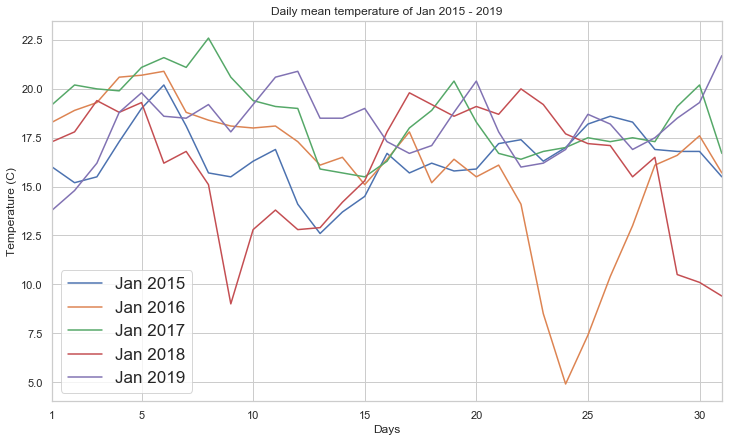

In [604]:
# initialise subplots as 'fig' and create axes as 'ax'
fig,ax = plt.subplots(figsize=(12,7))

# plot the 'Air Temp Mean' column of each respective January from 2015 to 2019
ax.plot(j2015['Air Temp Mean (C)'],label='Jan 2015')
ax.plot(j2016['Air Temp Mean (C)'],label='Jan 2016')
ax.plot(j2017['Air Temp Mean (C)'],label='Jan 2017')
ax.plot(j2018['Air Temp Mean (C)'],label='Jan 2018')
ax.plot(j2019['Air Temp Mean (C)'],label='Jan 2019')

# label the table for a clear presentation
ax.set_title('Daily mean temperature of Jan 2015 - 2019')
ax.set_xlabel('Days')
ax.set_ylabel('Temperature (C)')
ax.set_xlim(1,31)
ax.xaxis.set_ticks([1,5,10,15,20,25,30])
ax.legend(loc='lower left',prop={'size': 17})

In [223]:
# create separate dataframes for the 'Air Temp Mean' column
j2015_atm = pd.DataFrame(j2015['Air Temp Mean (C)'])
j2016_atm = pd.DataFrame(j2016['Air Temp Mean (C)'])
j2017_atm = pd.DataFrame(j2017['Air Temp Mean (C)'])
j2018_atm = pd.DataFrame(j2018['Air Temp Mean (C)'])
j2019_atm = pd.DataFrame(j2019['Air Temp Mean (C)'])

In [234]:
# rename their columns as their respective month and year
j2015_atm.rename(columns={"Air Temp Mean (C)": "Jan 2015"},inplace=True)
j2016_atm.rename(columns={"Air Temp Mean (C)": "Jan 2016"},inplace=True)
j2017_atm.rename(columns={"Air Temp Mean (C)": "Jan 2017"},inplace=True)
j2018_atm.rename(columns={"Air Temp Mean (C)": "Jan 2018"},inplace=True)
j2019_atm.rename(columns={"Air Temp Mean (C)": "Jan 2019"},inplace=True)

In [237]:
# concatenate them into a single dataframe 'mean_air_temp'
mean_air_temp = pd.concat([j2015_atm,j2016_atm,j2017_atm,j2018_atm,j2019_atm],axis=1)

In [287]:
mean_air_temp.head(5)

,Jan 2015,Jan 2016,Jan 2017,Jan 2018,Jan 2019
Day,,,,,
1,16.0,18.3,19.2,17.3,13.8
2,15.2,18.9,20.2,17.8,14.8
3,15.5,19.3,20.0,19.4,16.2
4,17.3,20.6,19.9,18.8,18.8
5,19.0,20.7,21.1,19.3,19.8


Text(0, 0.5, 'Temperature (Celsius)')

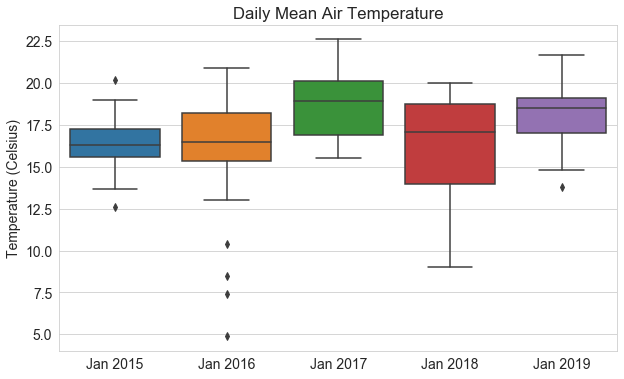

In [297]:
# plot figure using seaborn boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=mean_air_temp)

# label figure
plt.title('Daily Mean Air Temperature')
plt.ylabel('Temperature (Celsius)')

### Correlation between Daily max/min temperature and Total bright sunshine hours

In [405]:
# make separate dataframes for the absolute daily max,min temperature columns, and the
# hours of sunshine column, assign them to their respective years
temp_sun15 = j2015[['Air Temp Absolute Daily Max (C)','Air Temp Absolute Daily Min (C)',
                          'Total Bright Sunshine (hours)']]
temp_sun16 = j2016[['Air Temp Absolute Daily Max (C)','Air Temp Absolute Daily Min (C)',
                          'Total Bright Sunshine (hours)']]
temp_sun17 = j2017[['Air Temp Absolute Daily Max (C)','Air Temp Absolute Daily Min (C)',
                          'Total Bright Sunshine (hours)']]
temp_sun18 = j2018[['Air Temp Absolute Daily Max (C)','Air Temp Absolute Daily Min (C)',
                          'Total Bright Sunshine (hours)']]
temp_sun19 = j2019[['Air Temp Absolute Daily Max (C)','Air Temp Absolute Daily Min (C)',
                          'Total Bright Sunshine (hours)']]

In [408]:
# rename the columns for easy referencing later
list = [temp_sun15,temp_sun16,temp_sun17,temp_sun18,temp_sun19]
for df in list:
    df.columns = ['Daily Max','Daily Min','Sunshine hours']

In [468]:
plt.rcParams.update({'font.size':11})

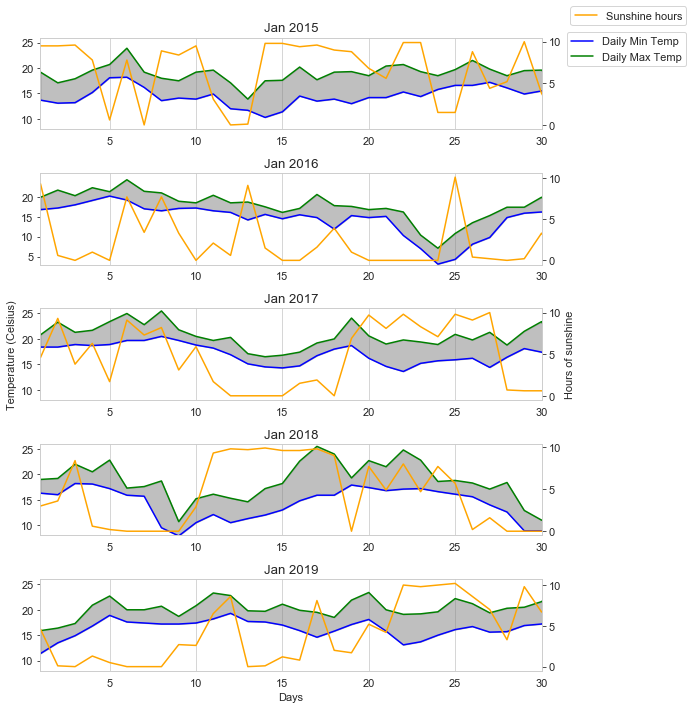

In [482]:
plt.figure(figsize=(10,10))

# create all our axes for all 5 graphs 
ax0 = plt.subplot(511)
ax1 = ax0.twinx()
ax2 = plt.subplot(512,sharex=ax0)
ax3 = ax2.twinx()
ax4 = plt.subplot(513,sharex=ax0,sharey=ax0)
ax5 = ax4.twinx()
ax6 = plt.subplot(514,sharex=ax0,sharey=ax0)
ax7 = ax6.twinx()
ax8 = plt.subplot(515,sharex=ax0,sharey=ax0)
ax9 = ax8.twinx()

# set their grid to y-axis only
ax0.grid(axis='y')
ax1.grid(False)
ax2.grid(axis='y')
ax3.grid(False)
ax4.grid(axis='y')
ax5.grid(False)
ax6.grid(axis='y')
ax7.grid(False)
ax8.grid(axis='y')
ax9.grid(False)

# plot the data from temp_sun15
ax0.plot('Daily Min',data=temp_sun15,color='blue',label='Daily Min Temp')
ax0.plot('Daily Max',data=temp_sun15,color='green',label='Daily Max Temp')
# fill_between to show temperature range of that day
ax0.fill_between(temp_sun15.index,temp_sun15['Daily Min'],temp_sun15['Daily Max'],alpha=0.5,color='gray')
ax1.plot('Sunshine hours',data=temp_sun15,color='orange')

# temp_sun16
ax2.plot('Daily Min',data=temp_sun16,color='blue')
ax2.plot('Daily Max',data=temp_sun16,color='green')
ax2.fill_between(temp_sun16.index,temp_sun16['Daily Min'],temp_sun16['Daily Max'],alpha=0.5,color='gray')
ax3.plot('Sunshine hours',data=temp_sun16,color='orange')

# temp_sun17
ax4.plot('Daily Min',data=temp_sun17,color='blue')
ax4.plot('Daily Max',data=temp_sun17,color='green')
ax4.fill_between(temp_sun17.index,temp_sun17['Daily Min'],temp_sun17['Daily Max'],alpha=0.5,color='gray')
ax5.plot('Sunshine hours',data=temp_sun17,color='orange')

# temp_sun18
ax6.plot('Daily Min',data=temp_sun18,color='blue')
ax6.plot('Daily Max',data=temp_sun18,color='green')
ax6.fill_between(temp_sun18.index,temp_sun18['Daily Min'],temp_sun18['Daily Max'],alpha=0.5,color='gray')
ax7.plot('Sunshine hours',data=temp_sun18,color='orange')

# temp_sun19
ax8.plot('Daily Min',data=temp_sun19,color='blue')
ax8.plot('Daily Max',data=temp_sun19,color='green')
ax8.fill_between(temp_sun19.index,temp_sun19['Daily Min'],temp_sun19['Daily Max'],alpha=0.5,color='gray')
ax9.plot('Sunshine hours',data=temp_sun19,color='orange')

# add title to each graph
ax0.set_title('Jan 2015')
ax2.set_title('Jan 2016')
ax4.set_title('Jan 2017')
ax6.set_title('Jan 2018')
ax8.set_title('Jan 2019')

# set y and x axis limits and ticks
ax0.set_xlim(1,30)
ax0.set_ylim(8,26)
ax2.set_ylim(3,26)
ax0.yaxis.set_ticks([10,15,20,25])
ax2.yaxis.set_ticks([5,10,15,20])

# add labels to the diagram
ax0.legend(loc='upper right',bbox_to_anchor=(1.3,1.12))
ax1.legend(loc='upper right',bbox_to_anchor=(1.3,1.4))
ax1.get_shared_y_axes().join(ax1, ax3)
ax1.yaxis.set_ticks([0,5,10])
ax4.set_ylabel('Temperature (Celsius)')
ax5.set_ylabel('Hours of sunshine')
ax8.set_xlabel('Days')

plt.tight_layout()

In [509]:
display(temp_sun15[['Daily Max','Sunshine hours']].corr())
display(temp_sun15[['Daily Min','Sunshine hours']].corr())

,Daily Max,Sunshine hours
Daily Max,1.000000,0.211041
Sunshine hours,0.211041,1.000000


,Daily Min,Sunshine hours
Daily Min,1.000000,-0.294766
Sunshine hours,-0.294766,1.000000


### Mean amount of cloud vs. Total bright sunshine hours

In [586]:
j2016[['Mean Amount of Cloud (%)','Total Bright Sunshine (hours)']].corr()

,Mean Amount of Cloud (%),Total Bright Sunshine (hours)
Mean Amount of Cloud (%),1.000000,-0.934984
Total Bright Sunshine (hours),-0.934984,1.000000


In [556]:
sns.set(style='whitegrid')

Text(0.5, 1.0, 'Jan 2016')

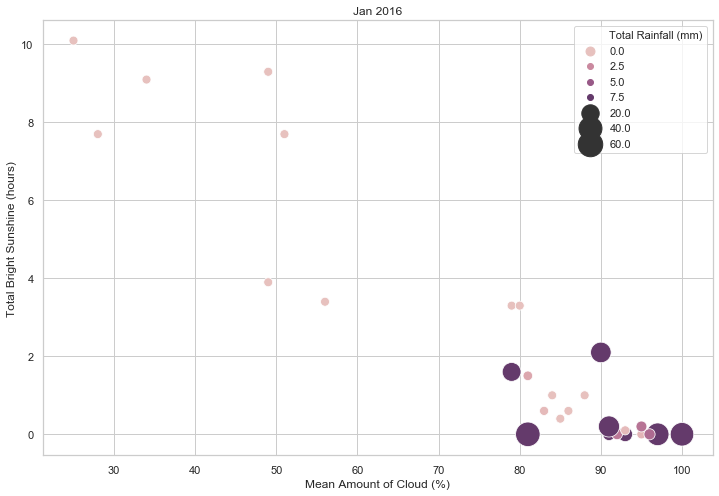

In [606]:
plt.figure(figsize=(12,8))

# sequential color palette from seaborn
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

# plot scatterplot, use total rainfall as 'hue' and 'size'
ax = sns.scatterplot(x='Mean Amount of Cloud (%)',y='Total Bright Sunshine (hours)',
                     hue='Total Rainfall (mm)',hue_norm=(0,7),size='Total Rainfall (mm)',
                     sizes=(80, 600),palette=cmap,data=j2016)
# add title
ax.set_title('Jan 2016')